# Exploratory Data Analysis

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score

ROOT_DIR = os.path.join(os.getcwd(), '..')
DATA_DIR = os.path.join(ROOT_DIR, 'data')

In [2]:
df = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,61756.0,1.112001,0.203803,0.625004,1.525551,-0.411192,-0.487768,0.097128,-0.058188,0.240017,...,-0.060900,0.046016,-0.004771,0.617385,0.591968,-0.346343,0.039778,0.022870,16.23,0
1,14146.0,1.029328,0.342431,1.770207,2.789720,-0.502749,0.889913,-0.765758,0.305110,0.984184,...,-0.134066,0.057442,0.088813,0.176178,0.174183,-0.084959,0.035024,0.019577,0.00,0
2,86766.0,1.859251,-0.089556,-1.797931,1.263054,0.550073,-0.613878,0.623408,-0.260165,-0.013979,...,0.124618,0.368915,-0.120664,-0.391513,0.436563,-0.494140,-0.034843,-0.062490,85.98,0
3,89554.0,2.007350,-0.201276,-2.975007,-0.564539,2.592582,3.148763,-0.394311,0.779978,0.357899,...,-0.342027,-1.005914,0.348492,0.605699,-0.270805,0.217856,-0.042423,-0.039825,18.99,0
4,152467.0,1.971963,-0.260036,-0.890866,0.157986,-0.400340,-0.456131,-0.637954,0.162661,1.247789,...,-0.244251,-0.621574,0.344276,-0.564486,-0.546258,-0.272251,0.015402,-0.026908,1.00,0


## Overview

In [3]:
df.isna().mean()

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199364 entries, 0 to 199363
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    199364 non-null  float64
 1   V1      199364 non-null  float64
 2   V2      199364 non-null  float64
 3   V3      199364 non-null  float64
 4   V4      199364 non-null  float64
 5   V5      199364 non-null  float64
 6   V6      199364 non-null  float64
 7   V7      199364 non-null  float64
 8   V8      199364 non-null  float64
 9   V9      199364 non-null  float64
 10  V10     199364 non-null  float64
 11  V11     199364 non-null  float64
 12  V12     199364 non-null  float64
 13  V13     199364 non-null  float64
 14  V14     199364 non-null  float64
 15  V15     199364 non-null  float64
 16  V16     199364 non-null  float64
 17  V17     199364 non-null  float64
 18  V18     199364 non-null  float64
 19  V19     199364 non-null  float64
 20  V20     199364 non-null  float64
 21  V21     19

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,...,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000
mean,94797.732921,-0.001913,0.001945,0.000655,-0.001755,-0.001228,-0.002230,0.000607,0.000834,-0.001640,...,-0.001691,0.001527,0.000817,-0.000774,0.000025,-0.000117,0.001260,-0.000289,88.077695,0.001725
std,47451.457883,1.965203,1.656356,1.523975,1.414896,1.391261,1.335423,1.257083,1.197742,1.096629,...,0.728316,0.725563,0.628770,0.605764,0.522593,0.482004,0.403013,0.334966,252.835808,0.041503
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.824849,-10.295397,-2.604551,-9.895244,-15.430084,0.000000,0.000000
25%,54221.750000,-0.921144,-0.594930,-0.885243,-0.848607,-0.691177,-0.769401,-0.553950,-0.208303,-0.643922,...,-0.228275,-0.542224,-0.161430,-0.355085,-0.317453,-0.326894,-0.070785,-0.053013,5.600000,0.000000
50%,84660.000000,0.016209,0.066110,0.183279,-0.019303,-0.054666,-0.275939,0.041047,0.022356,-0.052300,...,-0.029021,0.008607,-0.011070,0.040869,0.017126,-0.052104,0.001616,0.011218,22.000000,0.000000
75%,139256.000000,1.314697,0.804715,1.026410,0.742499,0.612449,0.397700,0.571632,0.328080,0.597096,...,0.186692,0.530376,0.147719,0.438197,0.351091,0.239461,0.091769,0.078411,77.222500,0.000000
max,172788.000000,2.454930,22.057729,4.226108,16.875344,34.801666,73.301626,120.589494,19.587773,10.392889,...,27.202839,10.503090,22.083545,4.584549,6.070850,3.463246,31.612198,33.847808,25691.160000,1.000000


## Distribuitions

In [6]:
def plot_distribution(
    dataframe: pd.DataFrame, column: str, output_metrics: bool = False
) -> dict:
    """
    Plots the distribution of a specified column in the dataframe,
    separated by the 'Class' column. It also calculates and displays
    statistical metrics such as mean, median, KS statistic, KS p-value,
    and AUC-ROC.
    Args:
        dataframe (pd.DataFrame): The input dataframe containing the data.
        column (str): The column name for which the distribution is to be plotted.
        output_metrics (bool): If True, returns a dictionary of calculated metrics.
    Returns:
        dict: A dictionary containing the calculated metrics if output_metrics is True.
    """
    _, ax = plt.subplots(figsize=(8, 5))

    mean_val = dataframe[column].mean()
    median_val = dataframe[column].median()

    ks_stat, ks_pval = ks_2samp(
        df.loc[df['Class'] == 0, column], df.loc[df['Class'] == 1, column]
    )

    auc_roc = roc_auc_score(dataframe['Class'], dataframe[column])

    q3, q1 = np.percentile(dataframe[column], [75, 25])

    ax.set_title(
        f'Distribution of {column} by Class'
        f'\nMean: {mean_val:.3f}, Median: {median_val:.3f}'
        f'\nKS stat: {ks_stat:.3f}, KS p-value: {ks_pval:.3f}'
        f'\nAUC-ROC: {auc_roc:.3f}'
        ''
    )

    sns.histplot(
        data=dataframe,
        x=column,
        hue='Class',
        bins=150,
        kde=True,
        stat='density',
        common_norm=False,
        alpha=0.6,
        ax=ax,
    )

    ax.axvline(mean_val, color='k', linestyle='--', alpha=0.5, label='Mean')
    ax.axvline(median_val, color='r', linestyle=':', alpha=0.5, label='Median')
    ax.axvline(q1, color='b', linestyle='-.', alpha=0.5, label='Q1 (25th percentile)')
    ax.axvline(q3, color='g', linestyle='-.', alpha=0.5, label='Q3 (75th percentile)')
    ax.legend()

    ax.set_xlabel('')
    ax.set_ylabel('Density')

    plt.tight_layout()
    plt.show()

    if output_metrics:
        return {
            'feature': column,
            'mean': mean_val,
            'median': median_val,
            'ks_stat': ks_stat,
            'ks_pval': ks_pval,
            'auc_roc': auc_roc,
        }

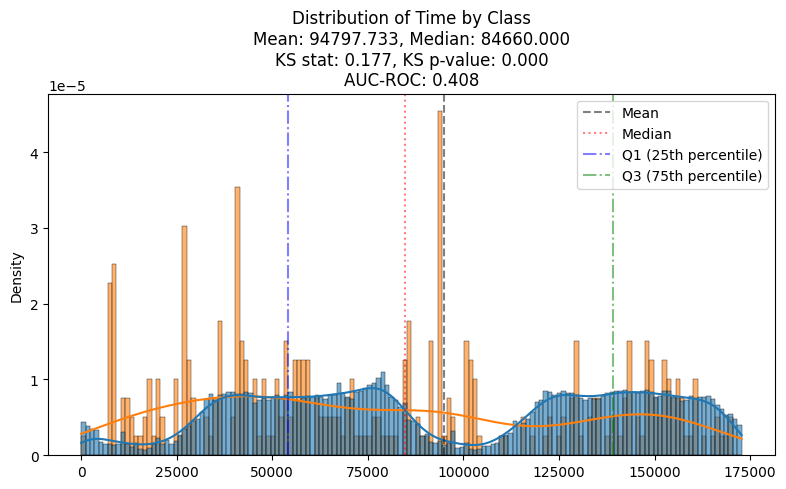

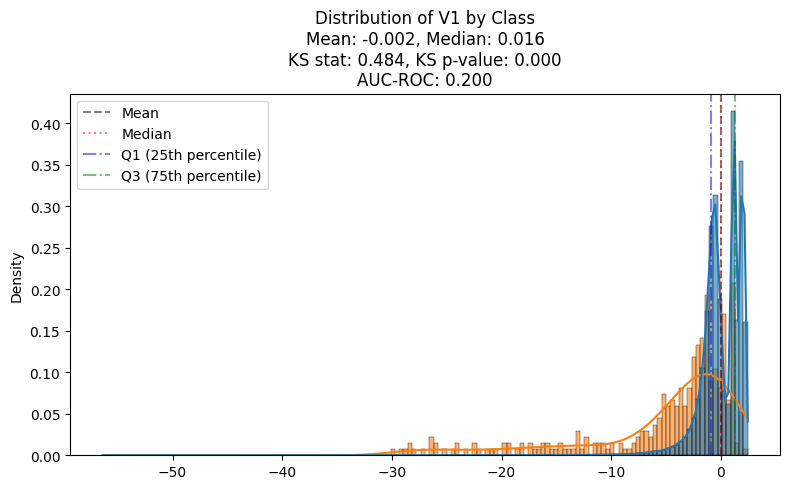

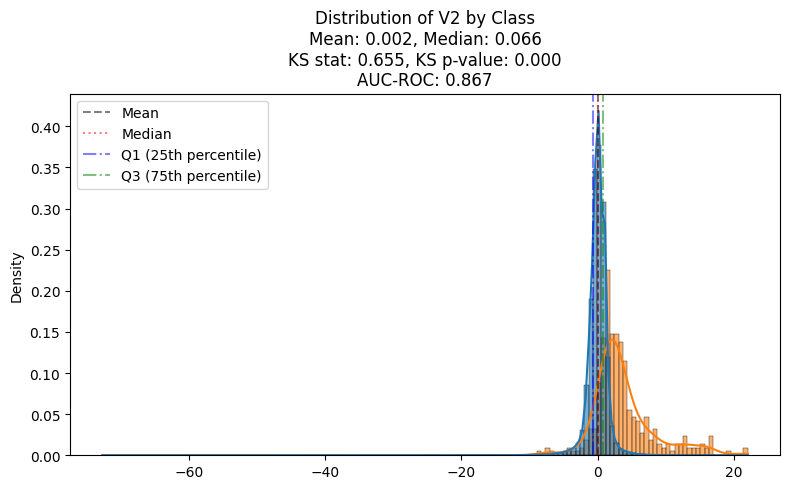

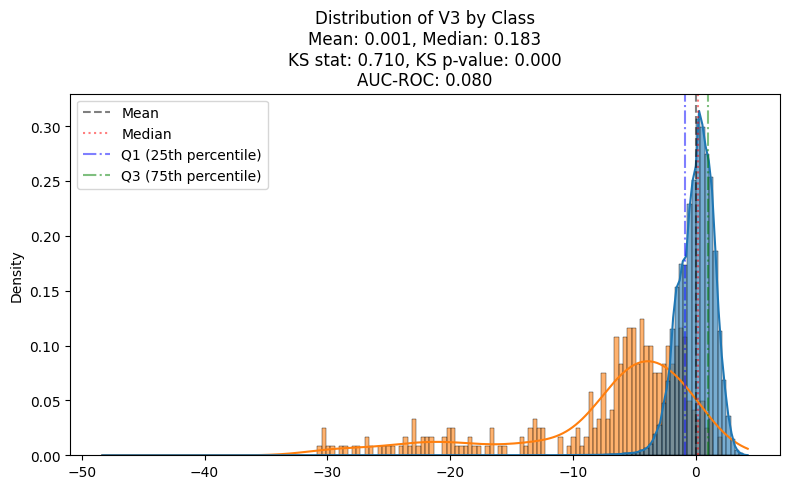

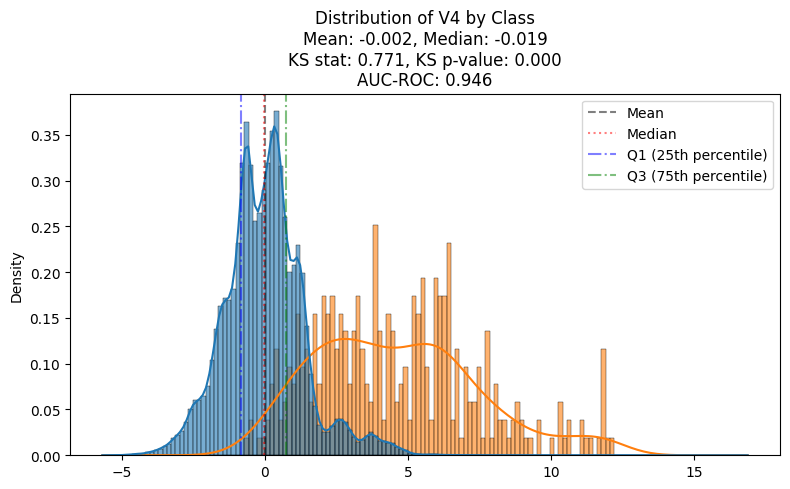

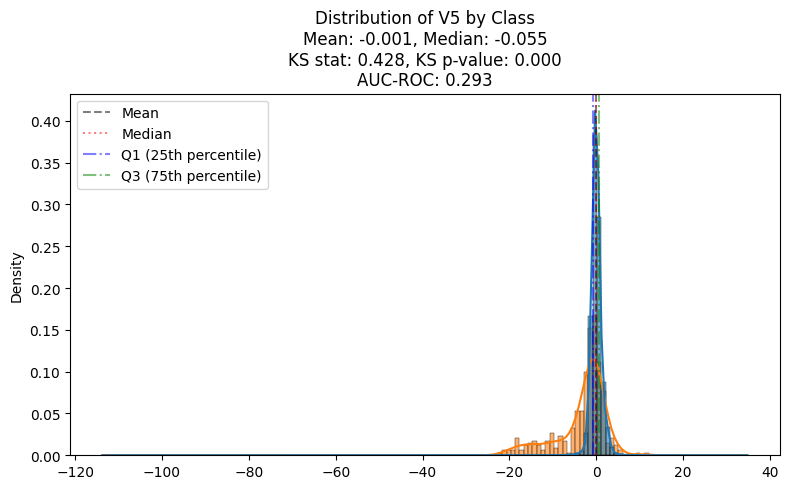

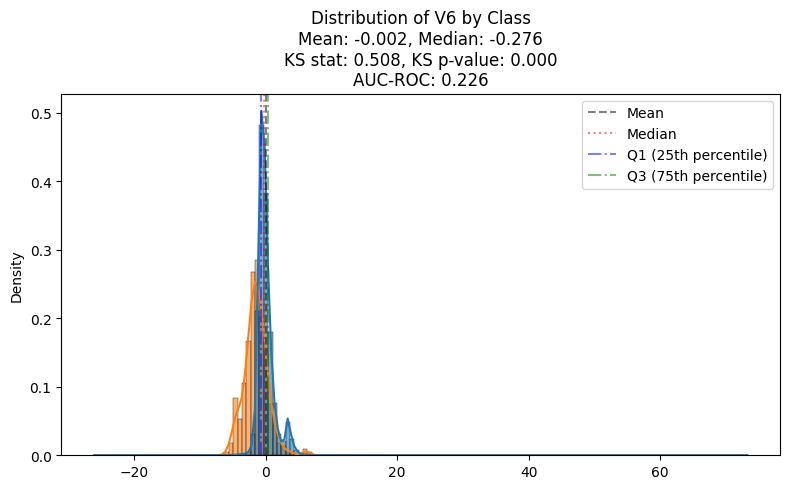

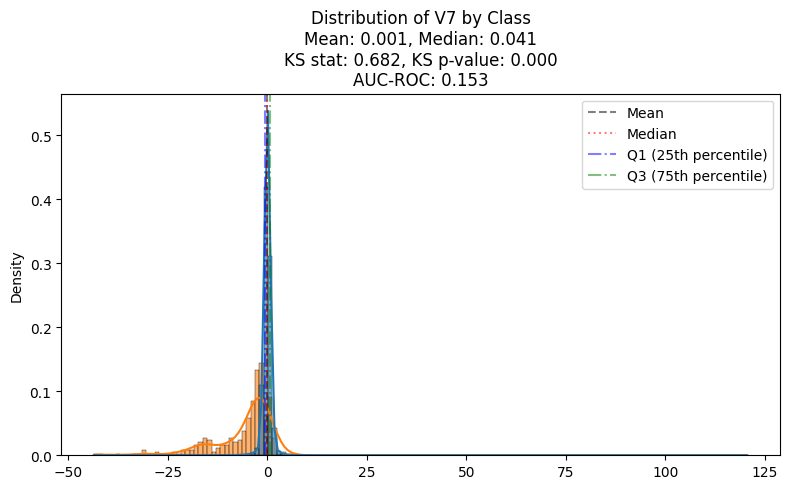

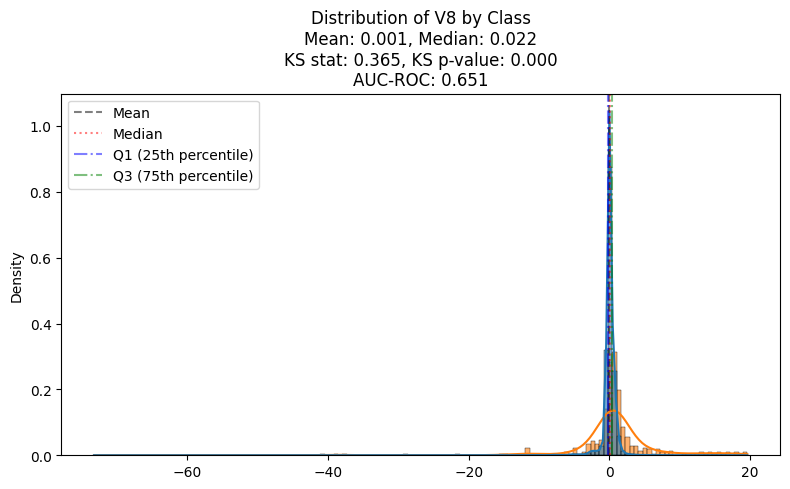

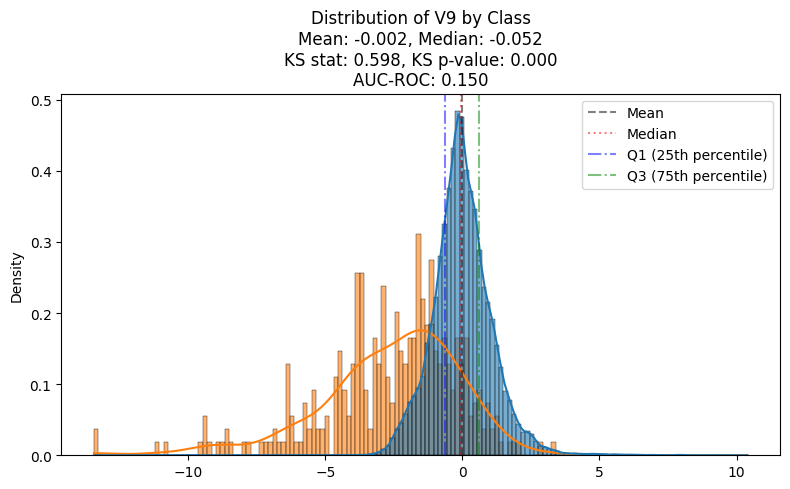

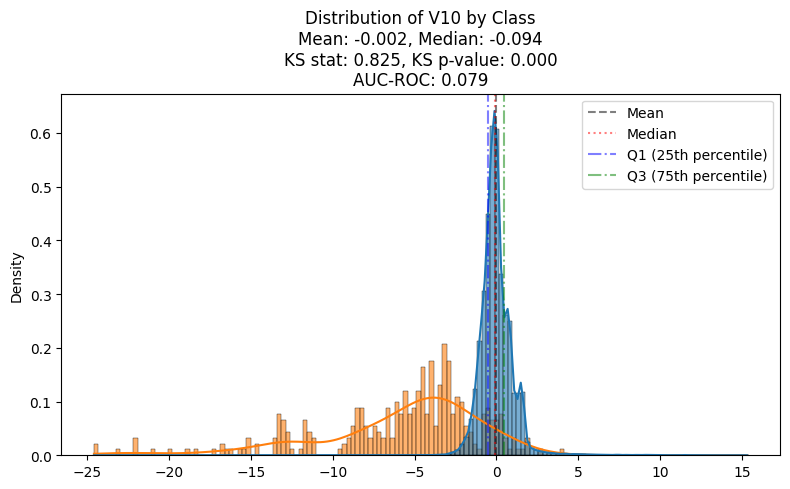

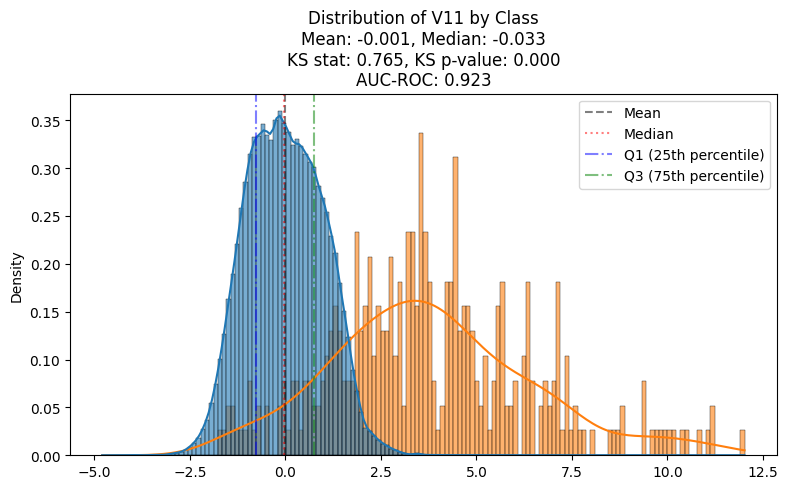

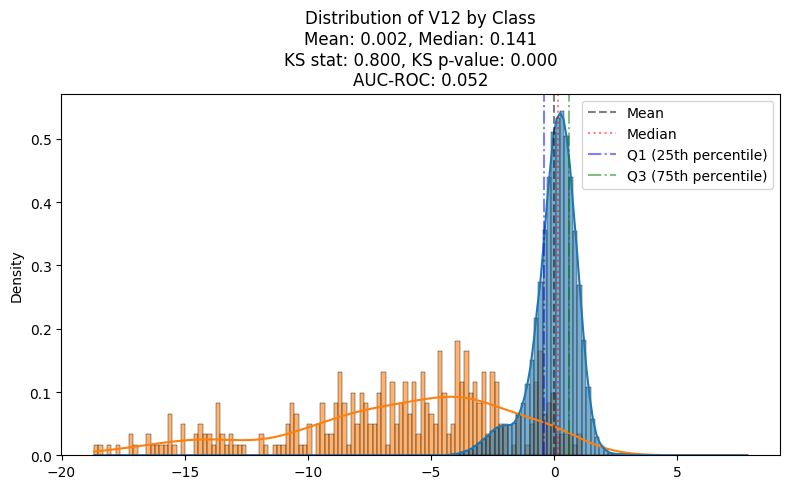

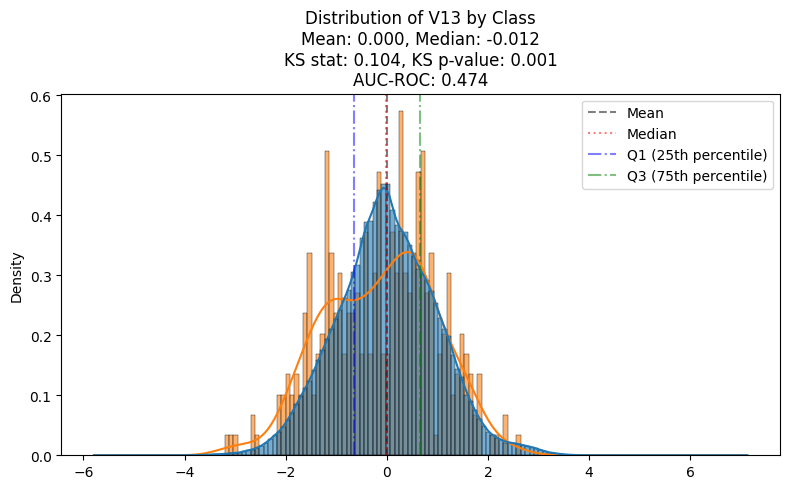

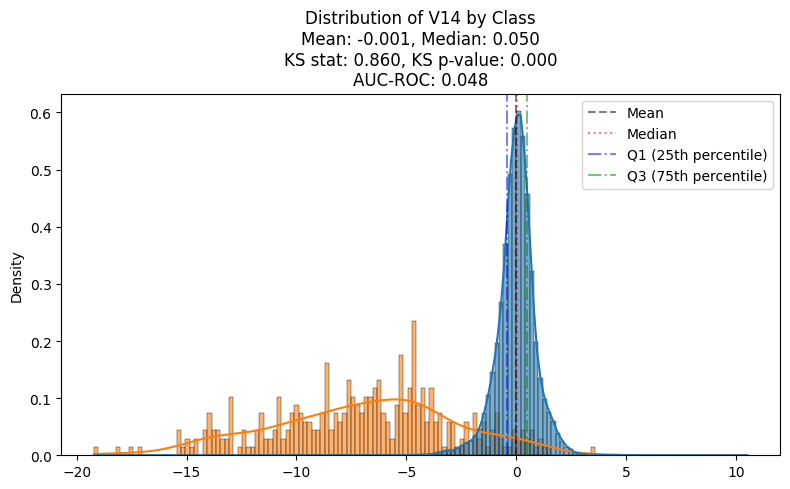

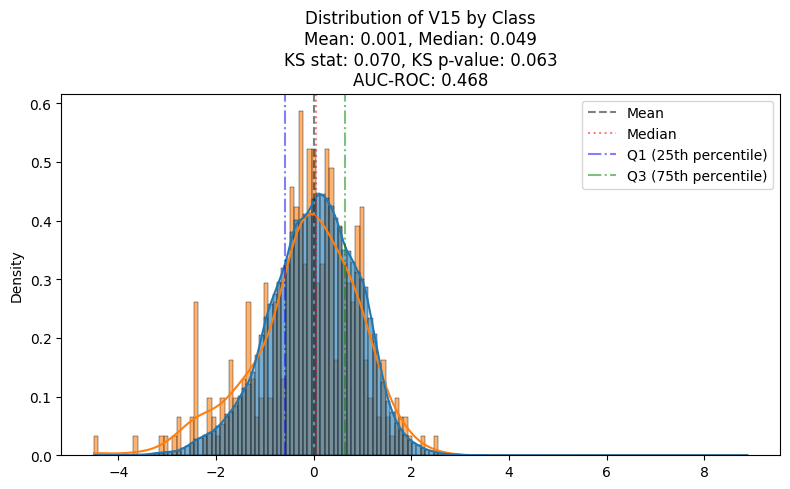

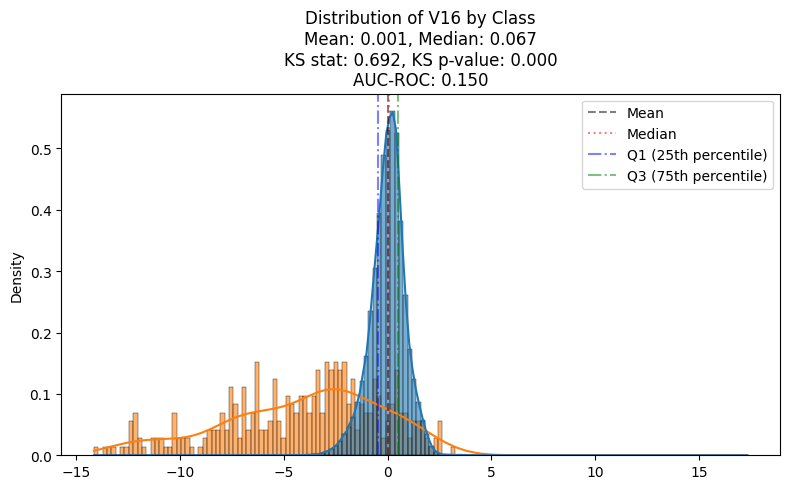

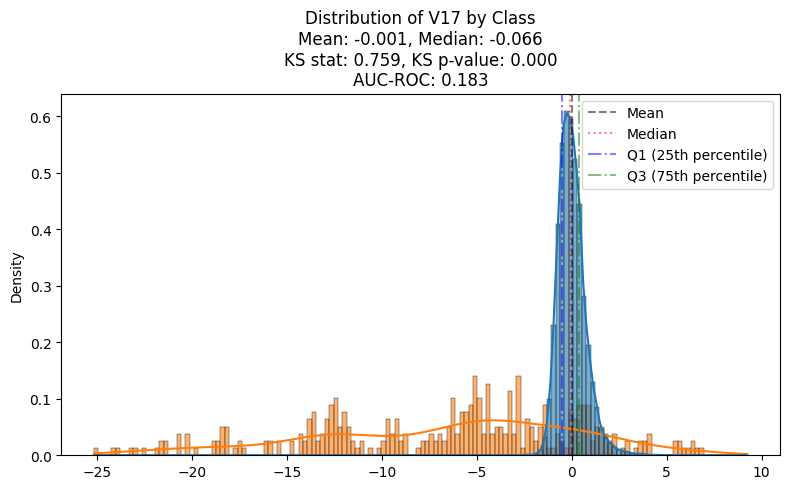

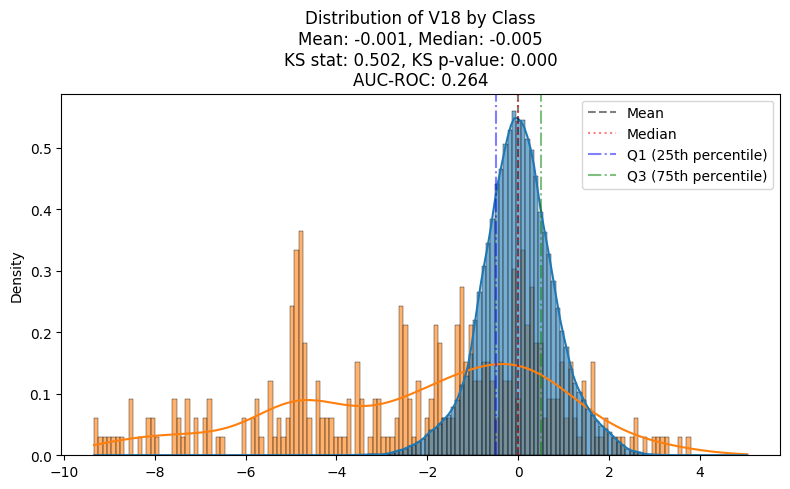

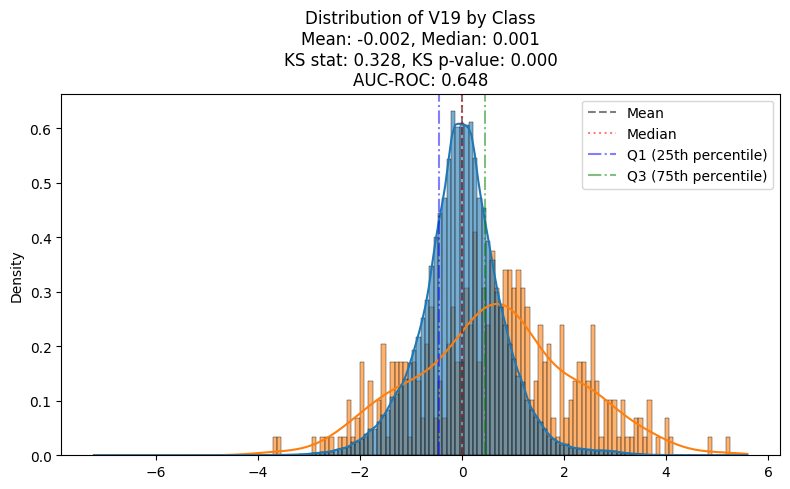

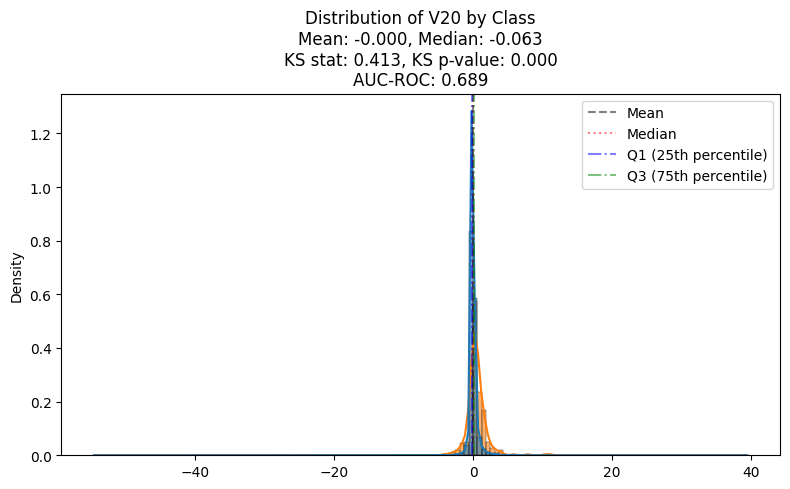

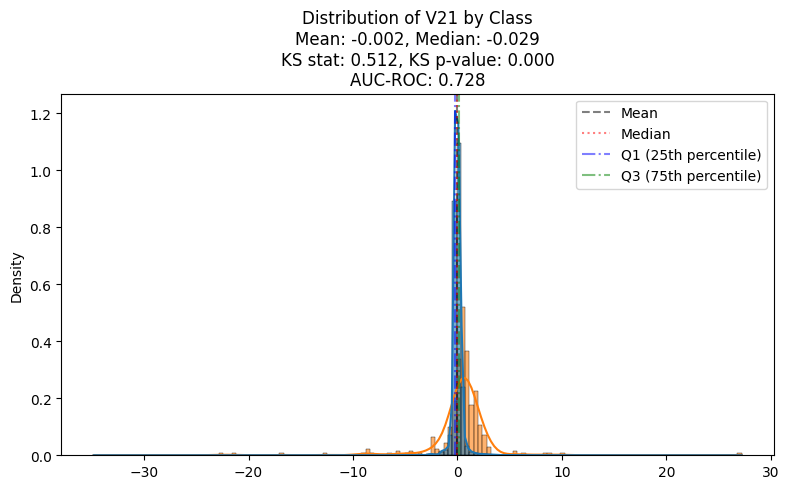

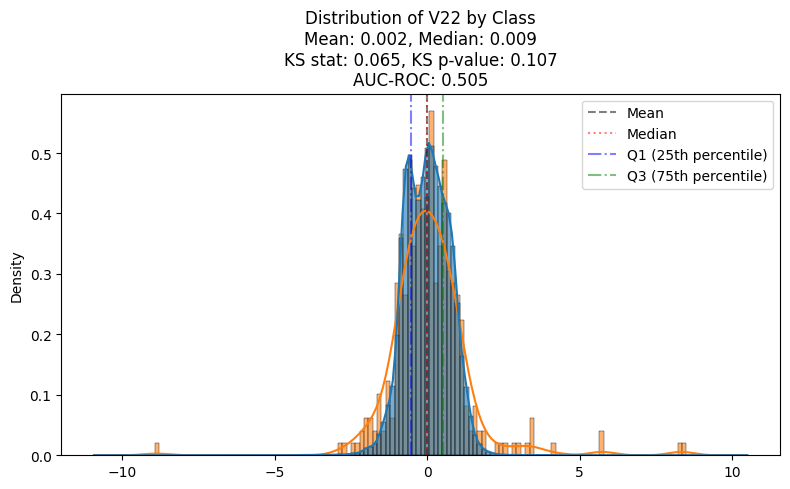

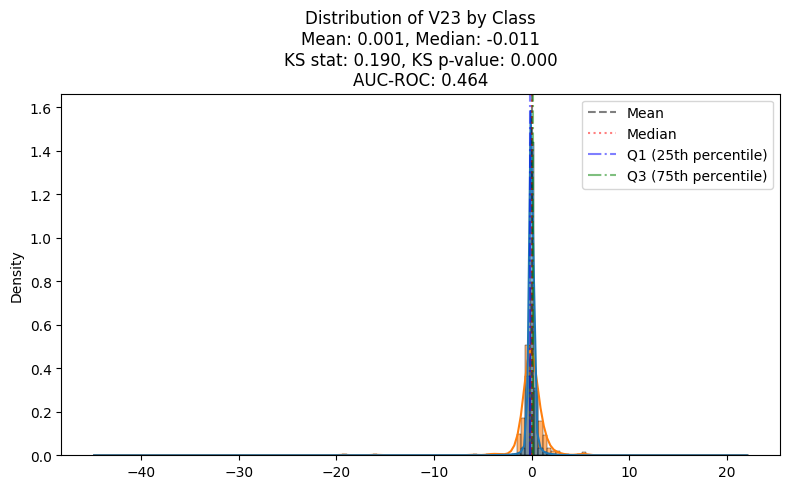

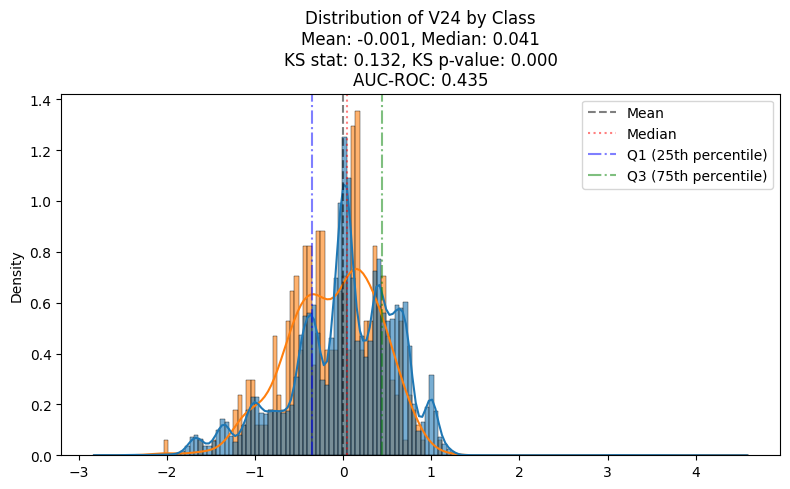

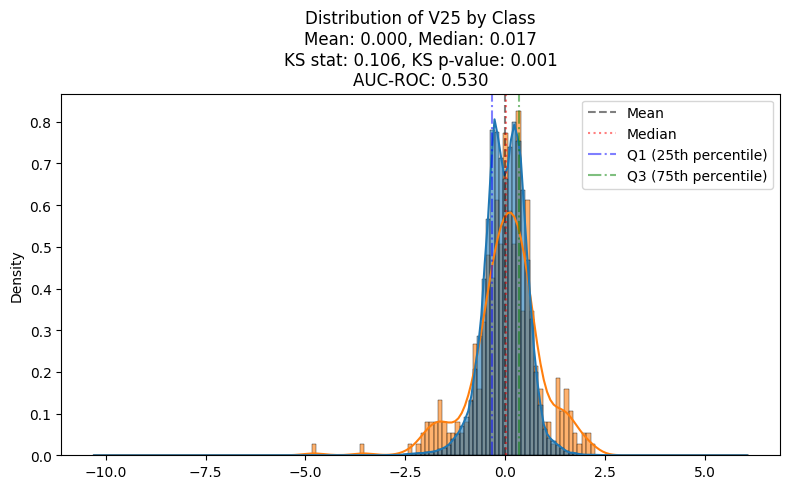

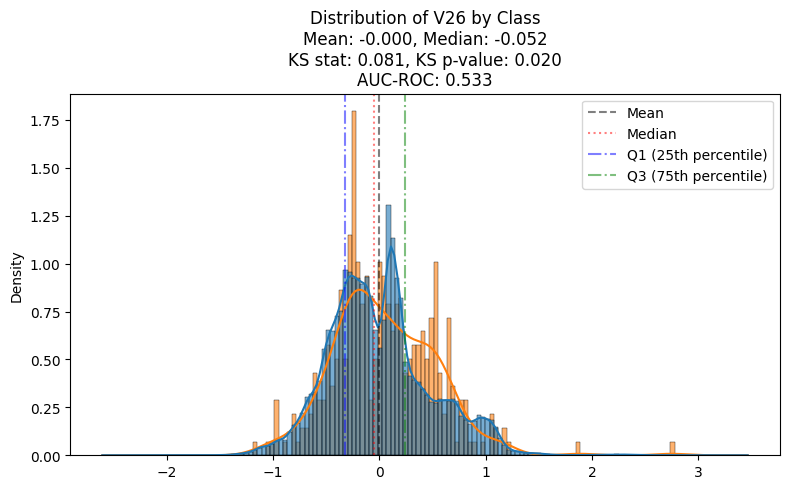

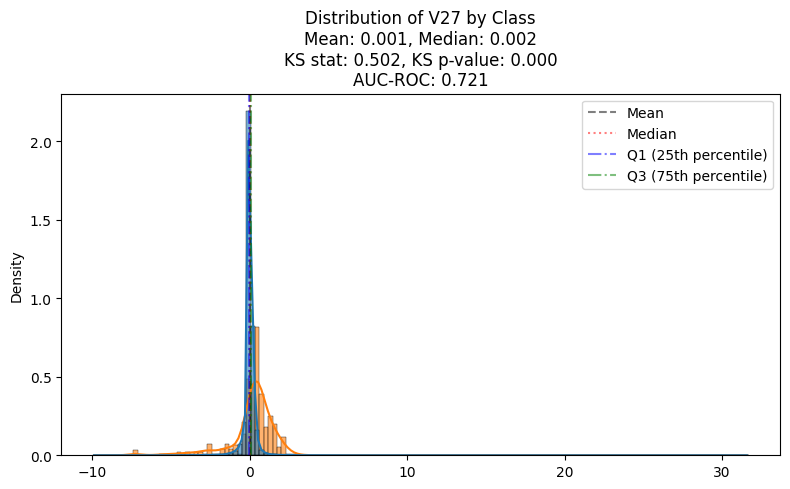

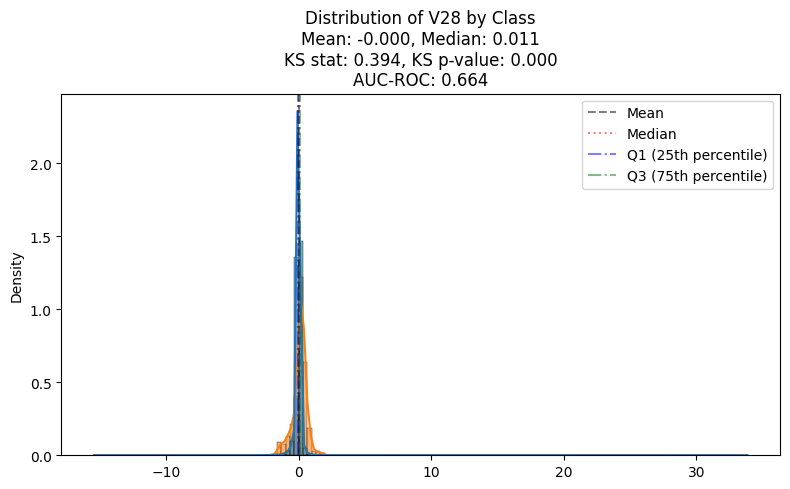

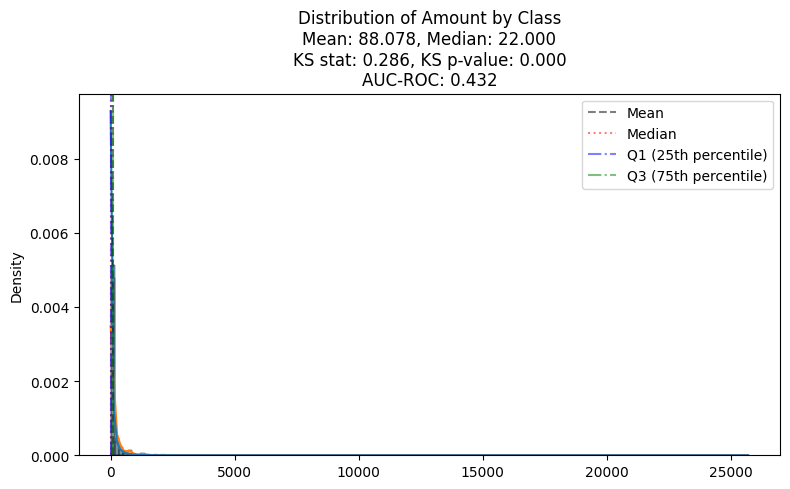

In [7]:
metrics = []
for col in df.columns[:-1]:
    metrics.append(plot_distribution(df, col, output_metrics=True))

In [8]:
df_metrics = pd.DataFrame(metrics)
df_metrics = df_metrics.sort_values(by='ks_stat', ascending=False)
df_metrics.head(40)

,feature,mean,median,ks_stat,ks_pval,auc_roc
14,V14,-0.000943,0.049563,0.860382,4.383775e-293,0.048170
10,V10,-0.002078,-0.093738,0.825258,2.503348e-258,0.078998
12,V12,0.002071,0.140879,0.800339,4.332743e-237,0.051884
4,V4,-0.001755,-0.019303,0.770667,1.822753e-214,0.946330
11,V11,-0.000634,-0.032814,0.765354,1.139406e-210,0.922613
17,V17,-0.000758,-0.066054,0.759325,1.906271e-206,0.183113
3,V3,0.000655,0.183279,0.709572,1.396683e-174,0.080312
16,V16,0.001262,0.066865,0.692246,1.442739e-164,0.149837
7,V7,0.000607,0.041047,0.681801,9.119868e-159,0.153099
2,V2,0.001945,0.066110,0.654865,1.467903e-144,0.867010


## Temporal Analysis
Note: Since the data uses relative seconds, the specific datetimes are arbitrary. However, this conversion is still useful for visualizing patterns.

In [14]:
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df = df.set_index('Time')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
1970-01-01 17:09:16,1.112001,0.203803,0.625004,1.525551,-0.411192,-0.487768,0.097128,-0.058188,0.240017,-0.131642,...,-0.060900,0.046016,-0.004771,0.617385,0.591968,-0.346343,0.039778,0.022870,16.23,0
1970-01-01 03:55:46,1.029328,0.342431,1.770207,2.789720,-0.502749,0.889913,-0.765758,0.305110,0.984184,0.221630,...,-0.134066,0.057442,0.088813,0.176178,0.174183,-0.084959,0.035024,0.019577,0.00,0
1970-01-02 00:06:06,1.859251,-0.089556,-1.797931,1.263054,0.550073,-0.613878,0.623408,-0.260165,-0.013979,0.397325,...,0.124618,0.368915,-0.120664,-0.391513,0.436563,-0.494140,-0.034843,-0.062490,85.98,0
1970-01-02 00:52:34,2.007350,-0.201276,-2.975007,-0.564539,2.592582,3.148763,-0.394311,0.779978,0.357899,-0.358998,...,-0.342027,-1.005914,0.348492,0.605699,-0.270805,0.217856,-0.042423,-0.039825,18.99,0
1970-01-02 18:21:07,1.971963,-0.260036,-0.890866,0.157986,-0.400340,-0.456131,-0.637954,0.162661,1.247789,-0.505076,...,-0.244251,-0.621574,0.344276,-0.564486,-0.546258,-0.272251,0.015402,-0.026908,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-02 15:26:21,-1.323530,-1.029454,1.024513,-1.616975,-0.331621,0.183772,-0.678534,0.625985,-0.439701,-0.644806,...,0.136913,-0.043812,0.033498,-1.053585,-0.066154,-0.308386,0.009400,-0.055126,113.90,0
1970-01-01 13:50:16,1.204255,0.295461,0.676943,1.505048,-0.286381,-0.166194,-0.187384,0.102180,-0.687615,0.722616,...,-0.313416,-1.060109,0.189381,-0.037659,-0.042811,0.609425,-0.080535,0.001811,0.72,0
1970-01-01 14:14:41,-1.228567,0.619970,2.089825,1.105723,-1.343898,0.303905,0.435586,0.508563,-0.377951,-0.940537,...,0.205501,0.270710,0.207338,0.330083,0.341522,-0.268411,-0.061106,0.044942,197.45,0


In [38]:
print(f'Time index range: {df.index.min()} to {df.index.max()}')

Time index range: 1970-01-01 00:00:00 to 1970-01-02 23:59:48


[]

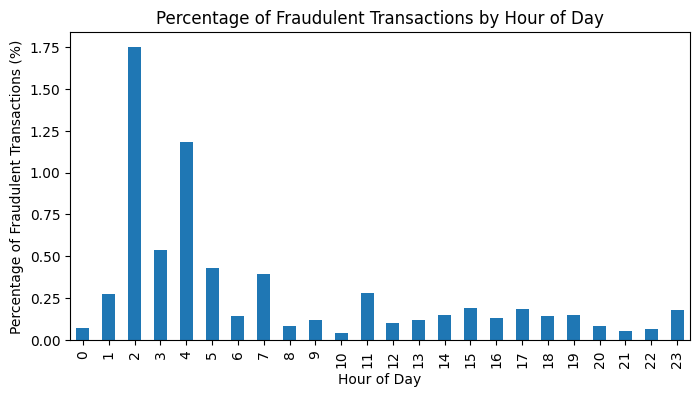

In [37]:
plt.figure(figsize=(8, 4))
(df.groupby(df.index.hour)['Class'].mean() * 100).plot(kind='bar')
plt.title('Percentage of Fraudulent Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Percentage of Fraudulent Transactions (%)')
plt.plot()

## Correlations

In [9]:
def correlation_matrix(correlation_matrix, ax=None, vmin=-1, vmax=1):
    """
    Description:
        - Plots a cool correlation matrix, based on seaborn heatmap
    Arguments:
        - Correlation Matrix Dataset (Ex: "df.corr()")
    """

    tri_mask = np.triu(np.ones_like(correlation_matrix))

    sns.heatmap(
        data=correlation_matrix,
        mask=tri_mask,
        annot=True,
        cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
        ax=ax,
        vmin=vmin,
        vmax=vmax,
    )

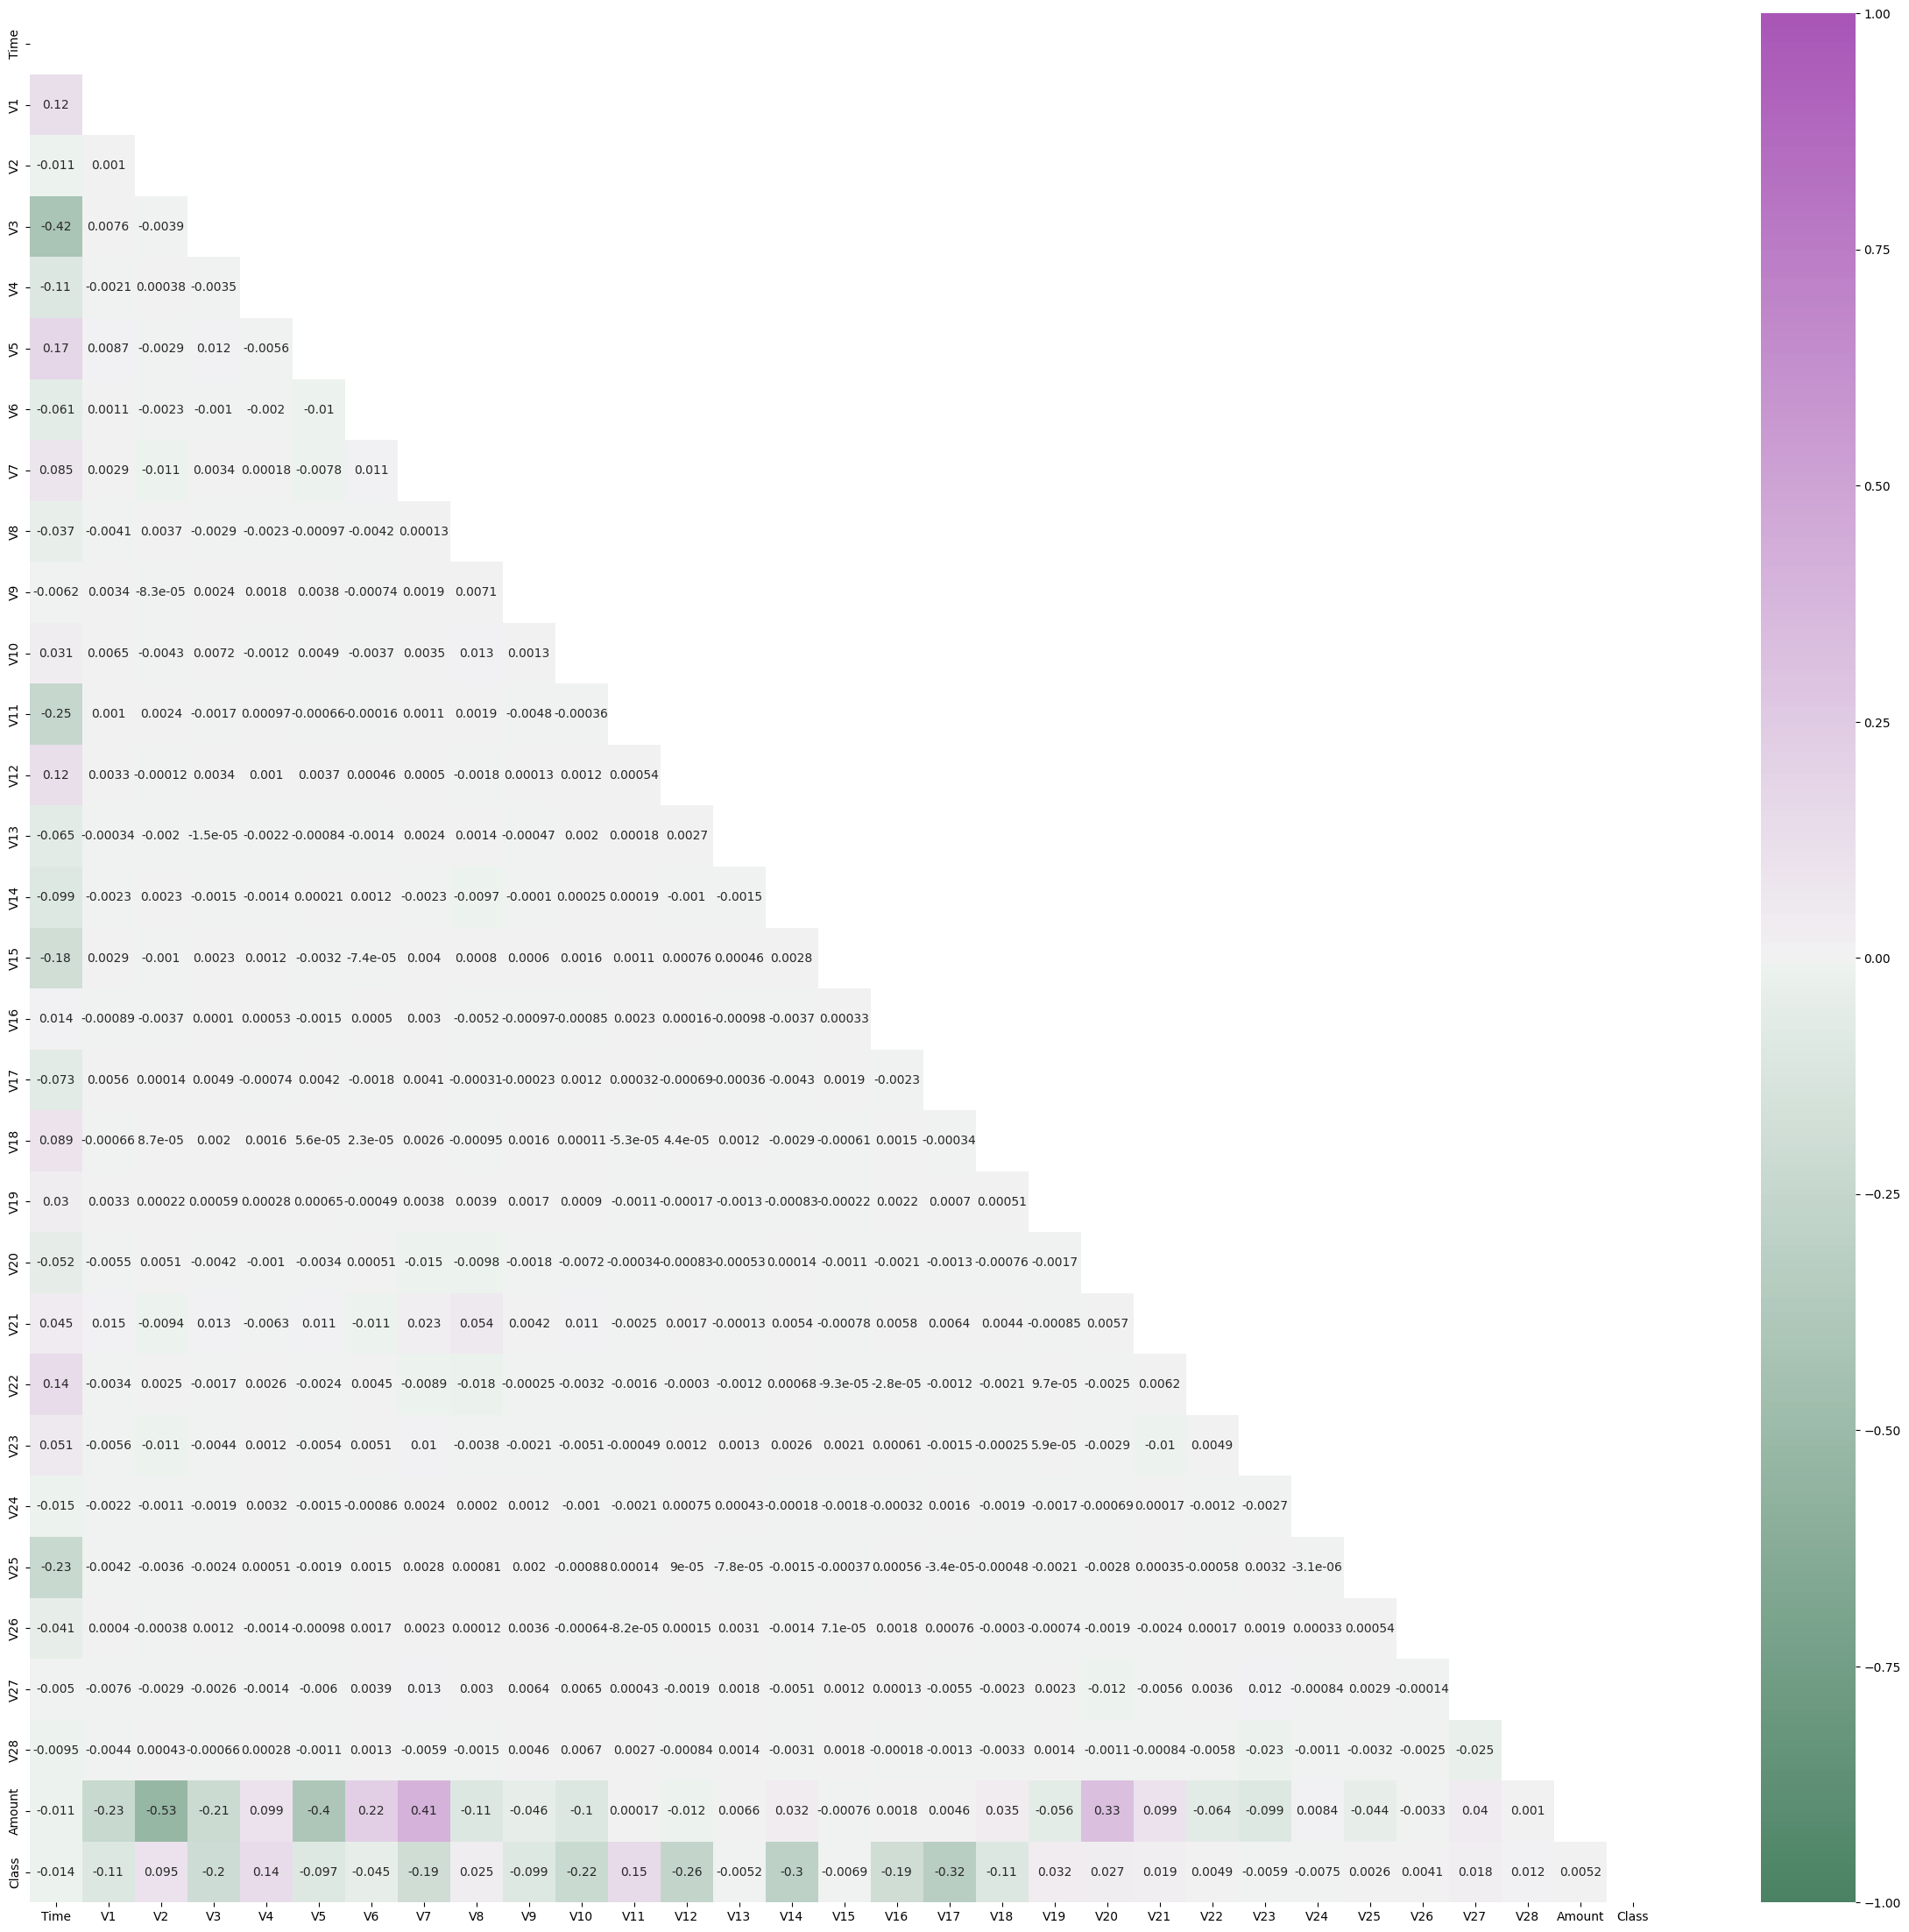

In [10]:
_, axes = plt.subplots(figsize=(30, 28))
correlation_matrix(df.corr())